In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('adult.data.text', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']
below_50K = df[df["salary-range"] == "<=50K"].sample(n=7841)
above_50K = df[df["salary-range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['class'] = (df["salary-range"] == ">50K")*1

/var/folders/j9/nxw6tr6x2630lrfnp_vmnv0m0000gn/T/ipykernel_54765/2482720998.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('adult.data.text', sep=", ", header=None)


In [5]:
def plot_scatter_plot(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    x = below_50K[column1]
    y = below_50K[column2]
    axes[0, 0].scatter(x,y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel(column1)
    axes[0, 0].set_ylabel(column2)
    
    x = above_50K[column1]
    y = above_50K[column2]
    axes[0, 1].scatter(x,y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel(column1)
    axes[0, 1].set_ylabel(column2)
    
    x = below_50K[column2]
    y = below_50K[column3]
    axes[1, 0].scatter(x,y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel(column2)
    axes[1, 0].set_ylabel(column3)
    
    x = above_50K[column2]
    y = above_50K[column3]
    axes[1, 1].scatter(x,y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel(column2)
    axes[1, 1].set_ylabel(column3)
    
    x = below_50K[column3]
    y = below_50K[column1]
    axes[2, 0].scatter(x,y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel(column3)
    axes[2, 0].set_ylabel(column1)
    
    x = above_50K[column3]
    y = above_50K[column1]
    axes[2, 1].scatter(x,y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel(column3)
    axes[2, 1].set_ylabel(column1)
    
    plt.show()

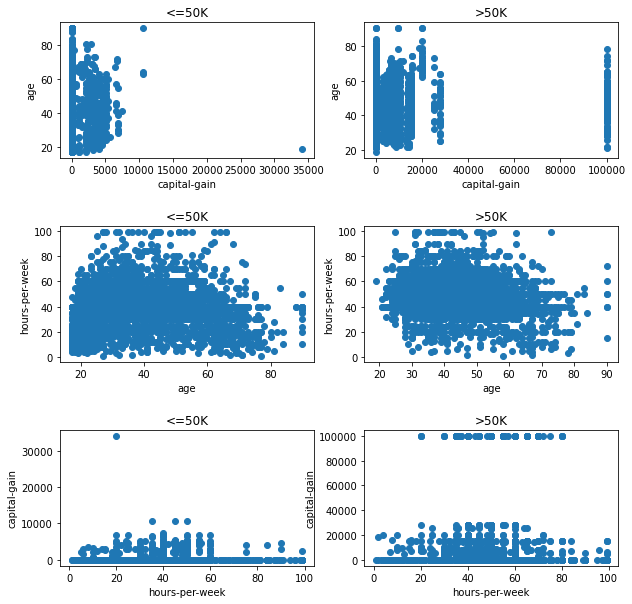

In [6]:
plot_scatter_plot('capital-gain', 'age', 'hours-per-week')

In [7]:
def plot_scatter_plot_diff(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,30))
    fig.subplots_adjust(hspace=.5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]
    axes[0].scatter(x,y,c=colors)
    axes[0].set_title("purple <=50K, yellow >50K")
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel(column2)
    
    x = df[column2]
    y = df[column3]
    axes[1].scatter(x,y,c=colors)
    axes[1].set_title("purple <=50K, yellow >50K")
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel(column3)
    
    x = df[column3]
    y = df[column1]
    axes[2].scatter(x,y,c=colors)
    axes[2].set_title("purple <=50K, yellow >50K")
    axes[2].set_xlabel(column3)
    axes[2].set_ylabel(column1)
    
    plt.show()

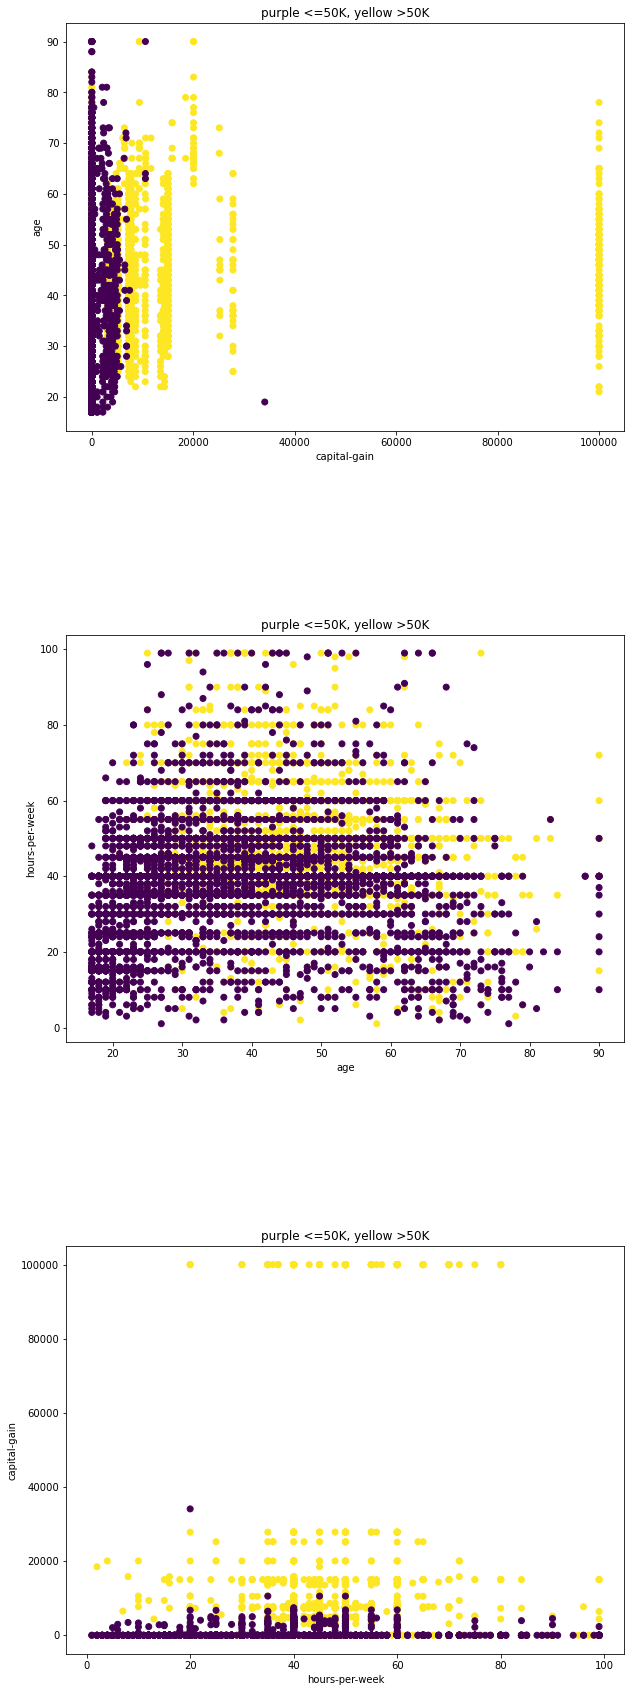

In [8]:
plot_scatter_plot_diff('capital-gain', 'age', 'hours-per-week')